In [13]:
pip install xgboost

def index_of_agreement(predicted, observed):
    """Calculates the Index of Agreement (IOA) between predicted and observed values."""
    n = len(predicted)
    mean_observed = sum(observed) / n
    
#     numerator = sum((predicted[i] - observed[i]) ** 2 for i in range(n))
    numerator = sum((predicted[i] - observed[i]) for i in range(n))
#     denominator = sum((abs(predicted[i] - mean_observed) + abs(observed[i] - mean_observed)) ** 2 for i in range(n))
    denominator = sum((observed[i] - mean_observed) for i in range(n))
    
    ioa = 1 - (numerator / denominator)
    return ioa

def weighted_mean_absolute_percentage_error(predicted, observed):
    """Calculates the Weighted Mean Absolute Percentage Error (WMAPE) between predicted and observed values."""
    n = len(predicted)
    numerator = sum(observed[i] * abs((predicted[i] - observed[i])/observed[i]) for i in range(n))
    denominator = sum(observed[i] for i in range(n))
    wmape = numerator / denominator
    return wmape

#!/usr/bin/env python
# coding: utf-8

# In[ ]:


# pip install sklearn-evaluation


# In[ ]:




# In[ ]:


# from google.colab import drive
# from google.colab import files

# drive.mount
# uploaded = files.upload()


# In[10]:


# remained Works:  parameter tunning of initial Estimators of meta model, selection of final estimator,plot results of grid search, XGBoost
import pandas as pd
import numpy as np
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
# from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import LocalOutlierFactor
from numpy import where
from scipy import stats
import seaborn as sn
from mpl_toolkits.axisartist.axislines import Subplot
from xgboost import XGBRegressor
# from keras.models import Sequential 
# from keras.layers import Dense
# import tensorflow as tf
# from keras import backend as K
# from keras.wrappers.scikit_learn import KerasRegressor
from sklearn_evaluation import plot

from permetrics.regression import RegressionMetric

# import scikeras
# from scikeras.wrappers import KerasRegressor


# In[11]:
# Edf=pd.read_csv("E.csv")
# UCSdf=pd.read_csv("UCS.csv")




def get_dataset():
    print('get_dataset function is running...')

    import io
    df =pd.read_csv("E.csv")
    # df =pd.read_csv('E:/MyPapers/Dr Freidooni2/data/E.csv')
    # dfUCS =pd.read_csv('E:/MyPapers/Dr Freidooni2/data/UCS.csv')
    dfUCS =pd.read_csv("UCS.csv")
    # df = pd.read_excel (io.BytesIO(uploaded['E.csv'])) #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'
    y=df['E']
    yUCS=dfUCS['UCS']
    X=df[['d','ne','vp','HBN']]
#     print(X)
    return X,y,yUCS


# In[12]:


# import pandas as pd 
# print(uploaded['E.csv'])

X, y,yUCS = get_dataset()
# import tensorflow as tf
print(X)
print(y)


# In[ ]:


# !wget "https://dl.freefontsfamily.com/download/Times-New-Roman.zip"
# !unzip "download?family=Times-New-Roman"
# uploaded = files.upload()
# from IPython import get_ipython
# get_ipython().system('mv times_new_roman.ttf /usr/share/fonts/truetype/')

# get_ipython().system('fc-cache -f -v')

# from matplotlib import font_manager
import matplotlib.font_manager
font_files =matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')


# font_dirs = ['C:/Windows/Fonts/']
# font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    matplotlib.font_manager.fontManager.addfont(font_file)

# fm = font_manager.font_manager
# fm.get_cachedir()



# In[ ]:


[f.name for f in matplotlib.font_manager.fontManager.ttflist]


# In[ ]:


from scipy.stats import norm
# # set font
plt.rcParams['font.family'] = 'Times New Roman Cyr'
plt.rcParams.update({'font.family':'Times New Roman Cyr'})

# drive.mount('mntdrive/')
Features = np.array(["$\gamma_d(kN/m^3)$","$n_e$(%)","$v_p$(m/s)","HBN(kgf/$mm^2$)"])
# from google.colab import drive
# drive.mount('/Figures')
images_dir = '/'
# y = np.array([3, 8, 1, 10])
# print(type(X))
XMatrix=X.to_numpy()
type(y)
type(yUCS)

for i in range(4):
  plt.hist(XMatrix[:,i].transpose(), bins = 7,density=True, color='b',  edgecolor='black')
  plt.rc('font', size=16)          # controls default text sizes
  plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=14)
  plt.xlabel(Features[i])
  plt.ylabel('Frequency')
  mu, std = norm.fit(XMatrix[:,i])
  # Plot the PDF.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  # print(x)
  p = norm.pdf(x, mu, std)
  # print(p)
  plt.plot(x, p, 'r', linewidth=2)
  title = "Mean = {:.2f}, Std Dev= {:.2f}, N=70".format(mu, std)
  plt.title(title)
  
  plt.show() 
  plt.savefig(f"{images_dir}testFigure.jpg")
  # plt.savefig('Histogram.jpg')


# In[ ]:


# Features = np.array(["E (GPa)","UCS (MPa)"])
Features = np.array(["UCS (MPa)"])
print(type(yUCS))
yEArray=np.array(y)
yUCSArray=np.array(yUCS)
# y=np.concatenate((yEArray,yUCSArray),axis=0)
# yMatrix=yEArray
yMatrix=yUCSArray
for i in range(1):
  plt.hist(yMatrix.transpose(), bins = 7,density=True, color='b',  edgecolor='black')
  plt.rc('font', size=16)          # controls default text sizes
  plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=14)
  plt.xlabel(Features[i])
  plt.ylabel('Frequency')
  mu, std = norm.fit(yMatrix)
  # Plot the PDF.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  # print(x)
  p = norm.pdf(x, mu, std)
  # print(p)
  plt.plot(x, p, 'r', linewidth=2)
  title = "Mean = {:.2f}, Std Dev= {:.2f}, N=70".format(mu, std)
  plt.title(title)

plt.show() 


# In[ ]:


def coeff_determination(y_true, y_pred):
      print("coeff_determination function is running...")

      SS_res =  K.sum(K.square( y_true-y_pred ))
      SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
      return ( 1 - SS_res/(SS_tot + K.epsilon()) )


# In[ ]:



# from sensitivity import sensitivityAnalysis
# sensitivityValues={'d':[2.17,8.03],'ne':[22.01,25.78],'vp':[3759.79,5347.06],'HBN':[271.81,975.79]}
# sa=sensitivityAnalysier(sensitivityValues,X)
# sa.df



# In[ ]:


# my function: find best parameters by grid search
def get_bestParm(name,model,X,y,weights):
    print("get_bestParm function is running....")

    foldCount=3;
    from sklearn.metrics import accuracy_score
#     single metric
    scoring = 'neg_mean_squared_error'
    refitValue="neg_mean_squared_error"
#     scoring = "r2"
#     refitValue=True
    if name=='SVR':
        params={
            "gamma": [0.001,0.01,0.1,1,10],
                "C": [0.001,0.01,0.1,1,10,100],
                "epsilon":[0.001,0.01,0.1,1,10]}
        grid_search = GridSearchCV(estimator = model, param_grid = params,scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)

        start_time = time.time()
        grid_search.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time

        parmsNames=['$\gamma$','C','$\epsilon$']
        plot_search_results(grid_search,parmsNames)
        print("{{{{{{}}}}}}")
        print('the best score of {0} ={1}'.format(name,grid_search.best_score_) )
        print('the std of best score of {0} ={1}'.format(name,grid_search.cv_results_['std_test_score'][grid_search.best_index_]))
        print(grid_search.best_estimator_)
        return grid_search.best_estimator_, execution_time
    elif name=='cart':
        params={'splitter':('best','random'),
            'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12],
           'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
           'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           'max_features':('auto','log2','sqrt',None),
           'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90] }
        grid_search = GridSearchCV(estimator = model, param_grid = params, 
                         scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)
        start_time = time.time()
        grid_search.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time

        print('the best score of {0} ={1}'.format(name,grid_search.best_score_) )
        return grid_search.best_estimator_, execution_time
    elif name=='kNN':
        params={'n_neighbors':[2,4,6,8,10,12,14,16,18,20],'weights':['uniform','distance']}
        grid_search = GridSearchCV(estimator = model, param_grid = params, 
                           scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)
        
        start_time = time.time()
        grid_search.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time

#         grid_search.fit(X,y)
        if "r2" in scoring:
            plot_grid_search(grid_search,
                                 'r2',
                                 params['n_neighbors'], 
                                 params['weights'],
                                 'k',
                                 'weights',[10,2])
        if "neg_mean_squared_error" in scoring:
            plot_grid_search(grid_search,
                                 'neg_mean_squared_error',
                                 params['n_neighbors'], 
                                 params['weights'],
                                 'k',
                                 'weights',[10,2])
        print("{{{{{{}}}}}}")
        print(grid_search.best_estimator_)
        return grid_search.best_estimator_
    elif name=='RF':
        params={'max_depth':[1,2,3,4,5,6,7,8,9,10],
                'n_estimators':[200,300,400,500]}
        grid_search = GridSearchCV(estimator = model, param_grid = params, 
                          scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)
#         grid_search.fit(X,y)
        start_time = time.time()
        grid_search.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time

        legendLabel=['Estimatior#: 200', 'Estimatior#: 300', 'Estimatior#: 400', 'Estimatior#: 500']
        newPlot_grid_search(grid_search,
                                 'neg_mean_squared_error',
                                 params['max_depth'], 
                                 params['n_estimators'],
                                ['max_depth','n_estimators'],
                                 'Maximum tree depth',
                                 'Estimators#',[11,10],legendLabel)
        print("{{{{{{}}}}}}")
        print('the best score of {0} ={1}'.format(name,grid_search.best_score_) )
        print('the std of best score of {0} ={1}'.format(name,grid_search.cv_results_['std_test_score'][grid_search.best_index_]))
        print(grid_search.best_estimator_)
        return grid_search.best_estimator_
    elif name=='MLP':
        params={
            'solver' : ['lbfgs',  'adam'],
            'hidden_layer_sizes': [
            (7,),(8,),(9,),(10,),(11,),(12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,)
             ]}
        grid_search = GridSearchCV(estimator = model, param_grid = params, 
                          scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)
#         grid_search.fit(X,y)
        start_time = time.time()
        grid_search.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time

        legendLabel=['Solver: Adam', 'Solver: L-BFGS']
        newPlot_grid_search(grid_search,
                             'neg_mean_squared_error',
                               [7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                        ['L-BFGS','Adam'],['hidden_layer_sizes','solver'],
                             'Hidden Layer Sizes',
                                 'Solver',[3,11],legendLabel)
        
        print("{{{{{{}}}}}}")
        print('the best score of {0} ={1}'.format(name,grid_search.best_score_) )
        print('the std of best score of {0} ={1}'.format(name,grid_search.cv_results_['std_test_score'][grid_search.best_index_]))
        print(grid_search.best_estimator_)
        return grid_search.best_estimator_
    elif name=='MLP2':
            params={
                'solver' : ['lbfgs', 'sgd', 'adam'],
                'hidden_layer_sizes': [
                 (1,2),(2,2),(3,2),(4,2),(5,2),(6,2),(7,2),(8,2),(9,2),(10,2),
                    (1,3),(2,3),(3,3),(4,3),(5,3),(6,3),(7,3),(8,3),(9,3),(10,3),
                    (1,4),(2,4),(3,4),(4,4),(5,4),(6,4),(7,4),(8,4),(9,4),(10,4),
                    (1,5),(2,5),(3,5),(4,5),(5,5),(6,5),(7,5),(8,5),(9,5),(10,5)
                 ]}
            grid_search = GridSearchCV(estimator = model, param_grid = params, 
                              scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)
#             grid_search.fit(X,y)
            start_time = time.time()
            grid_search.fit(X,y)
            end_time = time.time()
            execution_time = end_time - start_time

            if "r2" in scoring:
                plot_grid_search(grid_search,
                                     'r2',
                                     params['hidden_layer_sizes'], 
                                     params['solver'],
                                     'Hidden Layer Sizes',
                                     'Solver')
            plot_grid_search(grid_search,
                                 'neg_mean_squared_error',
                                 params['hidden_layer_sizes'], 
                                 params['solver'],
                                 'hidden_layer_sizes',
                                 'solver')
            print("{{{{{{}}}}}}")
            print(grid_search.best_estimator_)
            return grid_search.best_estimator_, execution_time
    elif name=='XGBoost':
            params={
                'n_estimators' : [400,600,800,1000, 1200,1400,1600,1800, 2000],
                'max_depth': [5,10, 20,30,40,50, 60, 70, 80, 90, 100],
            'learning_rate':[0.01, 0.1, 0.2, 0.3,0.4, 0.5,0.6,0.7,0.8,0.9]}
            grid_search = GridSearchCV(estimator = model, param_grid = params, 
                              scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)
            start_time = time.time()
            grid_search.fit(X,y)
            end_time = time.time()
            execution_time = end_time - start_time

            parmsNames=['Estimators#','Maximum tree depth','Learning rate']
            plot_search_results(grid_search, parmsNames)
            print("{{{{{{}}}}}}")
            print('the best score of {0} ={1}'.format(name,grid_search.best_score_) )
            print('the std of best score of {0} ={1}'.format(name,grid_search.cv_results_['std_test_score'][grid_search.best_index_]))
            print(grid_search.best_estimator_)
            return grid_search.best_estimator_

    elif name=='stacking':
        start_time = time.time()
        model.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time
        return model, execution_time
    elif name=='stacking_SVM':

        params={
            'final_estimator__gamma':[0.001,0.01,0.1,1,10,100],
            'final_estimator__C': [ 0.001,0.01,0.1,1,10],
            'final_estimator__epsilon':[0.001,0.01,0.1,1,10],
        }
        grid_search = GridSearchCV(estimator = model, param_grid = params, 
                          scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)
        
        parmsNames=['$\gamma$','C','$\epsilon$']
#         grid_search.fit(X,y)
        start_time = time.time()
        model.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time
        
        plot_search_results(grid_search,parmsNames)
        print('the best score of {0} ={1}'.format(name,grid_search.best_score_) )
        return grid_search.best_estimator_ 
    elif name=='stacking_XGB':
        print('model:')
        print(model)
        print('parms:')
        print(model.get_params().keys())
        params={
            'final_estimator__n_estimators' : [400,600,800,1000, 1200,1400,1600,1800, 2000],
            'final_estimator__max_depth': [5,10, 20,30,40,50, 60, 70, 80, 90, 100],
            'final_estimator__learning_rate':[0.01, 0.1, 0.2, 0.3,0.4, 0.5,0.6,0.7,0.8,0.9]}
        grid_search = GridSearchCV(estimator = model, param_grid = params, 
                          scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)
#         grid_search.fit(X,y)
        start_time = time.time()
        model.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time
        if len(params)<=2:
            if "r2" in scoring:
                plot_grid_search(grid_search,
                                     'r2',
                                     params['final_estimator__n_estimators'], 
                                     params['final_estimator__learning_rate'],
                                     'Estimators#',
                                     'Learning Rate',[9,10,11])
            if "neg_mean_squared_error" in scoring:
                plot_grid_search(grid_search,
                                     'neg_mean_squared_error',
                                     params['final_estimator__n_estimators'], 
                                     params['final_estimator__learning_rate'],
                                     'Estimators#',
                                     'Learning Rate',[9,10,11])
        return grid_search.best_estimator_, execution_time
    elif name=='stacked_XGB':
        params={
            'final_estimator__n_estimators' : [400,800, 1200,1600, 2000],
            'final_estimator__max_depth': [5,10, 20,40, 60,  80,  100],
        'final_estimator__learning_rate':[0.01,  0.2, 0.4, 0.6,0.8]}
        grid_search = GridSearchCV(estimator = model, param_grid = params, 
                          scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3)
#         grid_search.fit(X,y)
        start_time = time.time()
        model.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time
        if len(params)<=2:
            if "r2" in scoring:
                plot_grid_search(grid_search,
                                  'r2',
                                  params['n_estimators'], 
                                  params['max_depth'],
                                  'Estimators#',
                                  'Max Depth',
                                 [5,7,5])
            if "neg_mean_squared_error" in scoring:
                plot_grid_search(grid_search,
                                  'neg_mean_squared_error',
                                  params['n_estimators'], 
                                  params['max_depth'],
                                  'Estimators#',
                                  'Max Depth',[5,7,5])
        return grid_search.best_estimator_, execution_time
    elif name=='stacking_MLP':

        params={
            'final_estimator__solver' : ['lbfgs', 'adam'],
            'final_estimator__hidden_layer_sizes': [               
            #  (1,),(2,),(3,),(4,),(5,),(6,),
            (7,),(8,),(9,),(10,),(11,),(12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,)
             ]}      
        grid_search = GridSearchCV(estimator = model, param_grid = params, 
                          scoring=scoring,refit=True,return_train_score=True,cv = foldCount, n_jobs = -1, verbose = 3, )      
#         grid_search.fit(X,y)
        start_time = time.time()
        model.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time
        legendLabel=[ 'Solver: L-BFGS','Solver: Adam']
        newPlot_grid_search(grid_search,
                             'neg_mean_squared_error',
                               [7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                        ['L-BFGS','Adam'],['final_estimator__hidden_layer_sizes','final_estimator__solver'],
                            'Hidden Layer Sizes','Solver',[20,20],legendLabel)
        print('the best score of {0} ={1}'.format(name,grid_search.best_score_) )
        return grid_search.best_estimator_  , execution_time
    else:   
        start_time = time.time()
        model.fit(X,y)
        end_time = time.time()
        execution_time = end_time - start_time
        return model,execution_time


# In[ ]:


def plot_search_results(grid, parmNames):
    print("plot_search_results function is running...")


    """
    Params: 
        grid: A trained GridSearchCV object.
        parmNames: parmameter names for displaying in Figure
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    # means_train = results['mean_train_score']
    # stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    # masks_names=parmNames
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    # fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'Negative MSE', va='center', rotation='vertical')
    fig.text(0.04, 0.5, 'Negative MSE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        # y_2 = np.array(means_train[best_index])
        # e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='-', marker='o', label='test')
        # ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        # ax[i].set_xlabel(p.upper())
        ax[i].set_xlabel(parmNames[i])

    # plt.legend()
    plt.show()


# In[ ]:


def newPlot_grid_search(grid_search, metric, grid_param_1, grid_param_2, originalParmNames,name_param_1, name_param_2,ColumnsCount,legendLabel):
    print("newPlot_grid_search function is running...")
    
    cv_results=grid_search.cv_results_
    _, ax = plt.subplots()
    ax.set_frame_on(True)
    ax.tick_params(direction='out')
    ax.set_facecolor("white")
    ax.set_axis_on()
    
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.family':'Times New Roman Cyr'})
    plt.rcParams.update({'axes.edgecolor':'k'})
    plt.grid(False)
    coefficient=-1
    metricLabel='Negative MSE'
    if metric=='r2':    
      coefficient=1 
      metricLabel="$R^2$" 
    ax.set_frame_on(True)
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])


    print('originalParmNames[0]={0}'.format(originalParmNames[0]))
    print('gridParm1={0}'.format(grid_param_1))
    print('name_param_1={0}'.format(name_param_1))

   # ax=plot.grid_search(grid_search.cv_results_, (originalParmNames[0]),None,'line',None,ax)
    #ax.set_xticklabels(grid_param_1)
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.16),
    #       fancybox=True, shadow=True, ncol=np.min([ColumnsCount[0],2]), prop={'family': 'Times New Roman Cyr'}, fontsize=14,labels=legendLabel)
    
    # ax.set_xlabel(name_param_1, fontsize=14 , fontweight='normal', fontFamily='Times New Roman Cyr')
    # plt.xlabel(name_param_1)
    
    # ax.set_ylabel( metricLabel, fontsize=14 , fontweight='normal', fontFamily='Times New Roman Cyr')
    # plt.title('')
    # plt.show()    
    

    


# In[ ]:


def plot_grid_search(grid_search, metric, grid_param_1, grid_param_2, name_param_1, name_param_2,ColumnsCount):
    print("plot_grid_search function is running...")
    
    # print(grid_search.grid_scores_)
    cv_results=grid_search.cv_results_
    # print(cv_results)
    # Get Test Scores Mean and std for each grid search
    # scores_mean = cv_results[('mean_test_' + metric)]
    # scores_sd = cv_results[('std_test_' + metric)]
    scores_mean = cv_results['mean_test_score']
    print('cv_results.best_score_={0}'.format(grid_search.best_score_))
    print('cv_results.best_params_={0}'.format(grid_search.best_params_))
    print('cv_results[mean_test_score]={0}'.format( cv_results['mean_test_score']))
    print('cv_results[mean_train_score]={0}'.format( cv_results['mean_train_score']))
    cv_resultsDf = pd.DataFrame.from_dict(grid_search.cv_results_)
    print('data frame ='.format(cv_resultsDf))
    scores_df=pd.DataFrame(cv_results).sort_values(by='rank_test_score')
    best_row = scores_df.iloc[0, :]
    print('best row'.format(best_row['mean_test_score']))
    scores_sd = cv_results['std_test_score']
    print(pd.DataFrame(cv_results).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score'))    

    if grid_param_2 is not None:
        scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
        scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))
    print('scores_mean:')
    print(scores_mean)
    # Set plot style
#     plt.style.use('seaborn')
    
#     plt.rcParams['axes.edgecolor'] = 'black'
    # Plot Grid search scores
    _, ax = plt.subplots()
    ax.set_frame_on(True)
    ax.tick_params(direction='out')
    ax.set_facecolor("white")
    ax.set_axis_on()
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.family':'Times New Roman Cyr'})
    plt.rcParams.update({'axes.edgecolor':'k'})
    plt.grid(False)
    coefficient=-1
    metricLabel='MSE'
    if metric=='r2':    
      coefficient=1 
      metricLabel="$R^2$" 
    if grid_param_2 is not None:
        # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
        for idx, val in enumerate(grid_param_2):
            ax.plot(grid_param_1,coefficient*scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.16),
          fancybox=True, shadow=True, ncol=np.min([ColumnsCount[1],2]), prop={'family': 'Times New Roman Cyr'}, fontsize=14)
    else:
        # If only one Param1 is given
        ax.plot(grid_param_1, coefficient*scores_mean, '-o',label=name_param_1)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.16),
          fancybox=True, shadow=True, ncol=np.min([ColumnsCount[0],3]), prop={'family': 'Times New Roman Cyr'}, fontsize=14)

    # only for MLP
    if name_param_1=='Hidden Layer Sizes':
      plt.xticks(grid_param_1)

    ax.set_frame_on(True)
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    ax.set_xlabel(name_param_1, fontsize=14 , fontweight='normal', fontFamily='Times New Roman Cyr')
    
    # ax.set_ylabel('CV ' + str.capitalize(metric), fontsize=16 , fontweight='normal')
    ax.set_ylabel( metricLabel, fontsize=14 , fontweight='normal', fontFamily='Times New Roman Cyr')
    
    


# In[ ]:


# get a list of models to evaluate
def get_models():
    print("get_models function is running...")

    seed = np.random.seed(22)
    rng = np.random.RandomState(1)
    models = dict()
    models['XGBoost'] = XGBRegressor()
    # models['kNN'] = KNeighborsRegressor()   
    models['MLP'] = MLPRegressor(max_iter=2000, random_state=1)
    models['SVR'] = SVR(kernel='rbf' )
    models['RF'] = RandomForestRegressor(random_state=rng)

    #  models['LR'] = LinearRegression()
    # models['MLP2'] = MLPRegressor(max_iter=2000, random_state=1)
    # models['cart'] = DecisionTreeRegressor()
    from keras.models import Sequential
    from keras.layers import Dense
    import tensorflow as tf

    from keras import backend as K

    def coeff_determination(y_true, y_pred):
      print("coeff_determination is running...")

      SS_res =  K.sum(K.square( y_true-y_pred ))
      SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
      return ( 1 - SS_res/(SS_tot + K.epsilon()) )


    model = Sequential()
    model.add(Dense(12, input_dim=4, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mse', optimizer='adam', metrics=[coeff_determination])

    
    return models


# In[ ]:


# evaluate a given model using cross-validation
def evaluate_model(model,X_train, X_test, y_train, y_test):
    print("evaluate_model function is running...")

    history=model.fit(X_train,y_train)
    yhatTrain=model.predict(X_train)
    yhat=model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, yhat)
    mse = metrics.mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test,yhat)
    evaluator=RegressionMetric(y_test, yhat)
    # results=evaluator.get_metrics_by_list_names(list_metric_names=["RMSE","VAF","MAPE","A20","CI"],list_paras=[{"multi_output":"raw_values"},]*5)
    # VAF=evaluator.VAF(multi_output="raw_values")
    return yhat,mae,mse,rmse,r2,history,yhatTrain, evaluator


# In[ ]:


dim=4
arrayX=X.to_numpy()
arrayY=y.to_numpy()
arrayyUCS=yUCS.to_numpy()
# Sensitivity Analysis
rr=[0,0,0,0]
for j in range(dim):
  temp=arrayX[:,j]*arrayY[:]
  temp1=np.power(arrayX[:,j],2)
  temp2=np.power(arrayY,2)
  rr[j]=(np.sum(temp)/np.sqrt(np.sum(temp1)*np.sum(temp2)))
  
# print(rr)


# plot
fig, ax = plt.subplots()
c = ['red', 'green', 'orange', 'blue']
# ax.bar(['$\gamma_d$','$n_e$','$v_p$','HBN'], rr, width=0.8, edgecolor="white",color=c, linewidth=0.5)
ax.bar(['$\gamma_d$','$n_e$','$v_p$','HBN'], rr, width=0.8, edgecolor="white",color=c, linewidth=0.5)
for index,data in enumerate(rr):
    plt.text(x=index-0.02,y=data+0.005, s= "{:.2f}".format(data) , fontdict=dict(fontsize=14))
ax.set( ylim=(0.6, 1))
plt.show()


# plot for yUCS
rr=[0,0,0,0]
for j in range(dim):
  temp=arrayX[:,j]*arrayyUCS[:]
  temp1=np.power(arrayX[:,j],2)
  temp2=np.power(arrayyUCS,2)
  rr[j]=(np.sum(temp)/np.sqrt(np.sum(temp1)*np.sum(temp2)))
print(rr)
  # plot
fig, ax = plt.subplots()
# c = ['red', 'green', 'orange', 'blue']
ax.bar(['$\gamma_d$','$n_e$','$v_p$','HBN'], rr, width=0.8, edgecolor="white",color=c, linewidth=0.5)
for index,data in enumerate(rr):
    plt.text(x=index-0.02,y=data+0.005, s= "{:.2f}".format(data) , fontdict=dict(fontsize=14))
plt.show()


# In[ ]:


def runBaseAlgorithms(X,y):# type(X)
  print("runBaseAlgorithms function  is running...")

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  print(X_train.shape)
  from sklearn.preprocessing import MinMaxScaler
  scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
  scalarX.fit(X_train)
  # scalarY.fit(y_train.values.reshape(-1,1))
  X_train = scalarX.transform(X_train)
  
  # get the models to evaluate
  models = get_models()
  print('models='.format(models))
  # evaluate the models and store results
  results, names = list(), list()
  i=1
  executionTime= dict()
  for name, model in models.items():
      tunnedModel, executionTime[name]=get_bestParm(name,model,X_train,y_train.ravel(),[])
      models[name]=tunnedModel
      print('&&&&')
      print(tunnedModel)
      print('&&&&')
          
  
  print(models)
  print('executionTime={0}', executionTime)
  predictedY=np.zeros((len(models),len(y_test)))
  PredictedYTrain=np.zeros((len(models),len(y_train)))
    # np.zeros((len(models),len(y_train)))
  mae=dict()
  mse=dict()
  rmse=dict()
  r2=dict()
  VAF=dict()
  MAPE=dict()   
  A20=dict() 
  CI=dict() 
  IOS=dict()
  WMAPE=dict()  
  IOA=dict()

  maeTrain=dict()
  mseTrain=dict()
  rmseTrain=dict()
  r2Train=dict() 
  VAFTrain=dict() 
  MAPETrain=dict()   
  A20Train=dict() 
  CITrain=dict()      

  i=0
  X_test  = scalarX.transform(X_test)
  for name, model in models.items():
      predictedYModel,mae[name],mse[name],rmse[name],r2[name],history,yhatTrain,evaluator = evaluate_model(model,X_train, X_test, y_train.ravel(), y_test.ravel())

      VAF[name]=evaluator.VAF(multi_output="raw_values")
      MAPE[name]=evaluator.MAPE(multi_output="raw_values")
      A20[name]=evaluator.A20(multi_output="raw_values")
      CI[name]=evaluator.CI(multi_output="raw_values")
      IOS[name]=rmse[name]/np.mean(y_test.ravel())
      WMAPE[name]=weighted_mean_absolute_percentage_error(predictedYModel,y_test.ravel())
      IOA[name]=index_of_agreement(predictedYModel, y_test.ravel())

      maeTrain[name] = metrics.mean_absolute_error(y_train.ravel(), yhatTrain)
      mseTrain[name] = metrics.mean_squared_error(y_train.ravel(), yhatTrain)
      rmseTrain [name]= np.sqrt(mseTrain[name])
      r2Train[name] = metrics.r2_score(y_train.ravel(),yhatTrain)
      evaluatorTrain=RegressionMetric(y_train.ravel(),yhatTrain)
      VAFTrain[name] =evaluatorTrain.VAF(multi_output="raw_values")
      MAPETrain[name]=evaluatorTrain.MAPE(multi_output="raw_values")
      A20Train[name]=evaluatorTrain.A20(multi_output="raw_values")
      CITrain[name]=evaluatorTrain.CI(multi_output="raw_values")

      PredictedYTrain[i,:]=yhatTrain
      # PredictedYTrain[name]=yhatTrain
      # print(yhatTrain.shape)
      # print(y_train.shape)
      # print('---yhatTrain')
      # print(yhatTrain)
      # print('---y_train')
      # print(y_train.ravel())
      # print('---')
      absoluteError=np.absolute(yhatTrain-y_train.ravel())
      normalizedAbsoluteError=absoluteError/(np.max(absoluteError)+0.00001)
      # print(normalizedAbsoluteError)
      # weights = np.zeros((1,len(yhatTrain)))
      weights=normalizedAbsoluteError/(1-normalizedAbsoluteError)
      print('---')
      if name=='DNN':
        print(predictedYModel.shape)
        predictedYModel=predictedYModel.reshape(len(y_test),)
        print(predictedYModel.shape)
      predictedY[i,:]=predictedYModel
      results.append(rmse[name])
      names.append(name)
      print('>%s %.3f,%.3f,%.3f,%.3f,%.3f' % (name, mae[name],mse[name],rmse[name],r2[name],VAF[name]))
      i=i+1
  return mae,mse,rmse,r2,normalizedAbsoluteError,weights,models,X_train,X_test,y_train,y_test,predictedY,PredictedYTrain, maeTrain, mseTrain,rmseTrain,r2Train,VAF,VAFTrain,MAPE,MAPETrain,CI,CITrain,A20,A20Train,IOS,WMAPE,IOA


# In[ ]:


def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):
    print("GridSearch_table_plot function is running...")
    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results)             .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()


# In[ ]:














mae,mse,rmse,r2,normalizedAbsoluteError,weights,models,X_train,X_test,y_train,y_test,predictedY,PredictedYTrain,maeTrainE,mseTrainE,rmseTrainE,r2TrainE,VAFE,VAFTrainE,MAPEE,MAPETrainE,CIE,CITrainE,A20E,A20TrainE,IOSE,WMAPEE,IOAE=runBaseAlgorithms(X,y)
maeyUCS,mseyUCS,rmseyUCS,r2yUCS,normalizedAbsoluteErroryUCS,weightsyUCS,modelsyUCS,X_train,X_test,y_trainyUCS,y_testyUCS,predictedyUCS,PredictedYTrainUCS,maeTrainUCS, mseTrainUCS,rmseTrainUCS,r2TrainUCS,VAFUCS,VAFTrainUCS,MAPEUCS,MAPETrainUCS,CIUCS,CITrainUCS,A20UCS,A20TrainUCS,IOSUCS,WMAPEUCS,IOAUCS=runBaseAlgorithms(X,yUCS)


# print(X)


# In[ ]:




print(maeTrainE, mseTrainE,rmseTrainE,r2TrainE, VAFTrainE, MAPETrainE,CITrainE,A20TrainE)
print('^^^^^^^^^^^^^new metrics for E^^^^^^^^^^^^^')
print("VAF={0},MAPE={1},CI(PI)={2},A20={3},IOS={4}, WMAPE={5}, IOA={6}",VAFE,MAPEE,CIE,A20E,IOS, WMAPEUCS,IOAUCS, WMAPEE, IOAE)
print('^^^^^^^^^^^^^^new metrics for UCS^^^^^^^^^^^^')
# print(maeTrainUCS, mseTrainUCS,rmseTrainUCS,r2TrainUCS)
print("VAF={0},MAPE={1},CI(PI)={2},A20={3},IOS={4}, WMAPE={5}, IOA={6}",VAFUCS,MAPEUCS,CIUCS,A20UCS,IOS,WMAPEUCS,IOAUCS)
print('^^^^^^^^^^^^^^*******^^^^^^^^^^^^')

# In[ ]:

for name in r2TrainE:
  print(name,r2TrainE[name])
for name in mseTrainE:
  print(name,mseTrainE[name])
for name in VAFTrainE:
  print(name,VAFTrainE[name])

# , mseTrainE,rmseTrainE,r2TrainE)


# In[ ]:


for name in r2TrainUCS:
  print(name,r2TrainUCS[name])
for name in mseTrainUCS:
  print(name,mseTrainUCS[name])
for name in VAFTrainUCS:
  print(name,VAFTrainUCS[name])
# , mseTrainE,rmseTrainE,r2TrainE)


# In[ ]:

# (pd.DataFrame.from_dict(data=VAFUCS,orinet='')).to_csv('VAFUCS.csv')
# (pd.DataFrame.from_dict(data=maeyUCS)).to_csv('maeE.csv')
# (pd.DataFrame.from_dict(data=CIUCS)).to_csv('CIUCS.csv')
# (pd.DataFrame.from_dict(data=A20UCS)).to_csv('A20UCS.csv')
# (pd.DataFrame.from_dict(data=MAPEUCS)).to_csv('MAPEUCS.csv')



# In[ ]:


# scores_mean=[[0.62879967, 0.65522623, 0.62041626, 0.64972037, 0.60425748 ,0.6534937,  0.56108763 ,0.63067605, 0.50905696, 0.59100625] [0.43925092, 0.55022683, 0.43260782, 0.53965881, 0.40668475 ,0.52305652 , 0.37584775 ,0.50523751 0.35346637 0.49098451]]
# bestValue=np.amax(scores_mean, axis=1)


# In[ ]:




def plotScatter(x,y,outputLabel,name,r2,offset):
  print("plotScatter function is running...")
  _, ax = plt.subplots()
  ax.set_frame_on(True)
  ax.tick_params(direction='out')
  ax.set_facecolor("white")
  ax.set_axis_on()
  # plt.rcParams["legend.loc"] = 'best'
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams.update({'font.family':'Times New Roman Cyr'})
  plt.rcParams.update({'axes.edgecolor':'k'})
  plt.grid(False)
  plt.plot(x, y, 'o')
  m, b = np.polyfit(x, y, 1)
  plt.plot(x, m*x + b)
  plt.plot(x, x,'k',linestyle='dashed')
  ax.set_xlabel(outputLabel+' (observed)', fontsize=14 , fontweight='normal')
  ax.set_ylabel(outputLabel+ ' (predicted)', fontsize=14 , fontweight='normal')
  plt.title(name, fontsize=14 , fontweight='normal')
  #  str(m)+'*X+'+str(b)
  relation="$R^2$={:.2f}\nY={:.2f}X+{:.2f}".format(r2,m, b)
  ax.text(np.min(x)+offset[0], np.max(y)-offset[1], relation , fontsize=14 , fontweight='normal', fontfamily='Times New Roman Cyr')
  # , bbox=dict(facecolor='red', alpha=0.5)
  plt.show()



# In[ ]:


# comment permanently
# plotScatter(y_testyUCS,yhatUCS2,'UCS','Stacked Ensemble',r2UCS2,[1,4])


# In[ ]:


# print(sortedValues)
# importantIdexes=sortedIdx[len(sortedIdx)-13:len(sortedIdx)]
# print(importantIdexes)
# print('--')
# print(sortedIdx)


# In[ ]:


# sorted_mse = dict( sorted(mse.items()))
# print('Dictionary in descending order by value : ',sorted_mse)
print('>sorted Results in MSE')
{k: v for k, v in sorted(mse.items(), key=lambda item: item[1])}
# print(sorted(mse.items()))
# sorted_mse = dict( sorted(mse.items(), reverse=True))
# print('Dictionary in descending order by value : ',sorted_mse)


# In[ ]:


print('>sorted Results in R2')
{k: v for k, v in sorted(r2.items(), key=lambda item: item[1])}


# In[ ]:


# 	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# 	return X,y

# get a stacking ensemble of models
def get_stacking(models,metamodel):
    print("get_stacking function is running...")

	# define the base models
    level0 = list()
    for name,model in models.items():
        level0.append((name, model))
#     level0.append(('knn', models['knn']))
#     level0.append(('MLP2', models['MLP2']))
#     level0.append(('MLP', models['MLP']))
#     level0.append(('cart', models['cart']))
#     level0.append(('SVR',  models['SVR']))
#     level0.append(('LR',  models['LR']))
	# define meta learner model
#     level1=LinearRegression()
#     level1 = RandomForestRegressor()
#     level1 =SVR(kernel='rbf')
    level1 =metamodel
#     level1=MLPRegressor(max_iter=2000, random_state=1)
#     MLPRegressor(max_iter=500);
#     level1 = LinearRegression()
	# define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=3)
    return model


# In[ ]:


print('>sorted Results in MSE')
{k: v for k, v in sorted(mse.items(), key=lambda item: item[1])}


# In[ ]:


print(np.min(normalizedAbsoluteError))
print(np.max(normalizedAbsoluteError))
plt.plot(normalizedAbsoluteError*10)
plt.show()


# In[ ]:


def runStackedEnsemble(selectedModels,X_train,y_train,y_test,stackedName,metamodel):
  print("runStackedEnsemble function is running...")

  stackModel= get_stacking(selectedModels,metamodel)
  # estimator = KerasRegressor(build_fn=stackModel, epochs=100, batch_size=5, verbose=0)

  print('***')
  # print(estimator)
  print('***')
  print(stackModel.get_params().keys())
  # tunnedModel=get_bestParm('stacking_SVM',stackModel ,X_train,y_train.ravel(),[])
  print(stackedName)
  tunnedModel, executionTime=get_bestParm(stackedName,stackModel ,X_train,y_train.ravel(),[])
  # print(tunnedModel)
  # tunnedModel.fit(X_train,y_train.ravel())
  yhat=tunnedModel.predict(X_test)
  yhatTrain=tunnedModel.predict(X_train)
  mae = metrics.mean_absolute_error(y_test, yhat)
  mse = metrics.mean_squared_error(y_test, yhat)
  rmse = np.sqrt(mse)
  r2 = metrics.r2_score(y_test,yhat)
  print('>stackedDE %.3f,%.3f,%.3f,%.3f' % (mae,mse,rmse,r2))
  
    
  return mae,mse,rmse,r2,yhat,tunnedModel,yhatTrain, executionTime

# In[ ]:


stackedName='stacking_SVM'
metamodel=SVR(kernel='rbf')

selectedModels=dict()
selectedModels['SVR']= models['SVR']
# selectedModels['kNN']=   models['kNN'] 
selectedModels['XGBoost']=   models['XGBoost'] 
maeE,mseE,rmseE,r2E,yhatE,tunnedModelE,yHatTrainE, executionTime=runStackedEnsemble(selectedModels,X_train,y_train,y_test,stackedName,metamodel)


evaluator=RegressionMetric(y_test.to_numpy(), yhatE)
print(evaluator.VAF(multi_output="raw_values"), evaluator.MAPE(multi_output="raw_values"), evaluator.CI(multi_output="raw_values"),evaluator.A20(multi_output="raw_values"))
print('executionTime={0}',executionTime )


# selectedModelsUCS1=dict()
# # selectedModelsUCS1['XGB']= modelsyUCS['XGB']
# selectedModelsUCS1['MLP']= modelsyUCS['MLP'] 
# # selectedModelsUCS1['SVR']= modelsyUCS['SVR'] 
# selectedModelsUCS1['RF']= modelsyUCS['RF']
# selectedModelsUCS1['kNN']= modelsyUCS['kNN']
# print('model1')
# maeUCS1,mseUCS1,rmseUCS1,r2UCS1,yhatUCS1,tunnedModelUCS1=runStackedEnsemble(selectedModelsUCS1,X_train,y_trainyUCS,y_testyUCS,stackedName,metamodel)



# In[ ]:


print(maeE,mseE,rmseE,r2E)


# In[ ]:


print(tunnedModelE)




ModuleNotFoundError: No module named 'xgboost'

modelUCS_based on Training Data
runStackedEnsemble function is running...
get_stacking function is running...
***
***
dict_keys(['cv', 'estimators', 'final_estimator__activation', 'final_estimator__alpha', 'final_estimator__batch_size', 'final_estimator__beta_1', 'final_estimator__beta_2', 'final_estimator__early_stopping', 'final_estimator__epsilon', 'final_estimator__hidden_layer_sizes', 'final_estimator__learning_rate', 'final_estimator__learning_rate_init', 'final_estimator__max_fun', 'final_estimator__max_iter', 'final_estimator__momentum', 'final_estimator__n_iter_no_change', 'final_estimator__nesterovs_momentum', 'final_estimator__power_t', 'final_estimator__random_state', 'final_estimator__shuffle', 'final_estimator__solver', 'final_estimator__tol', 'final_estimator__validation_fraction', 'final_estimator__verbose', 'final_estimator__warm_start', 'final_estimator', 'n_jobs', 'passthrough', 'verbose', 'RF', 'MLP', 'RF__bootstrap', 'RF__ccp_alpha', 'RF__criterion', 'RF__max_depth

ValueError: operands could not be broadcast together with shapes (14,1) (56,1) 

findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: Font family 'Times New Roman Cyr' not found.
findfont: 

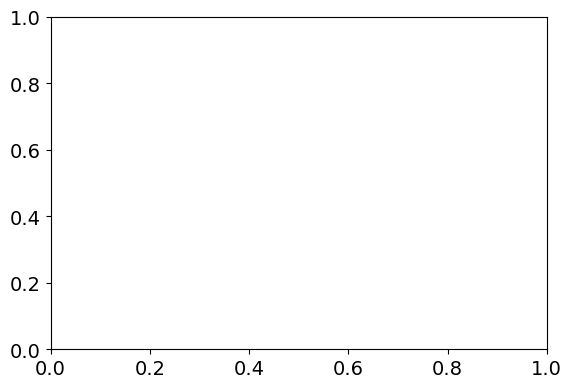

In [26]:

# In[ ]:


# selectedModelsUCS2=dict()
# # selectedModelsUCS2['SVR']= modelsyUCS['SVR']
# stackedName='stacking_MLP'
# metamodel=MLPRegressor(max_iter=4000, random_state=1)
# selectedModelsUCS2['MLP']= modelsyUCS['MLP'] 
# selectedModelsUCS2['XGBoost']= modelsyUCS['XGBoost'] 
# print('model2')
# maeUCS2,mseUCS2,rmseUCS2,r2UCS2,yhatUCS2,tunnedModelUCS2,yHatTrainUCS=runStackedEnsemble(selectedModelsUCS2,X_train,y_trainyUCS,y_testyUCS,stackedName,metamodel)
# print(maeUCS2,mseUCS2,rmseUCS2,r2UCS2)


# In[ ]:


# print(maeUCS2,mseUCS2,rmseUCS2,r2UCS2)
# print(tunnedModelUCS2)


# In[ ]:


# selectedModelsUCSTrain=dict()
# # selectedModelsUCS2['SVR']= modelsyUCS['SVR']
# stackedName='stacking_MLP'
# metamodel=MLPRegressor(max_iter=4000, random_state=1)
# selectedModelsUCSTrain['MLP']= modelsyUCS['MLP'] 
# selectedModelsUCSTrain['XGBoost']= modelsyUCS['XGBoost'] 
# print('modelUCS_based on Training Data')
# maeUCS_basedOnTrain,mseUCS_basedOnTrain,rmseUCS_basedOnTrain,r2UCS_basedOnTrain,yhatUCS_basedOnTrain,tunnedModelUCS_basedOnTrain,yHatTrainUCS_basedOnTrain=runStackedEnsemble(selectedModelsUCSTrain,X_train,y_trainyUCS,y_testyUCS,stackedName,metamodel)
# print(maeUCS_basedOnTrain,mseUCS_basedOnTrain,rmseUCS_basedOnTrain,r2UCS_basedOnTrain)


# In[ ]:


selectedModelsUCS3Train=dict()
# selectedModelsUCS2['SVR']= modelsyUCS['SVR']
stackedName3='stacking_MLP'
metamodel3=MLPRegressor(max_iter=4000, random_state=1)
selectedModelsUCS3Train['RF']= modelsyUCS['RF'] 
selectedModelsUCS3Train['MLP']= modelsyUCS['MLP'] 
print('modelUCS_based on Training Data')
maeUCS3,mseUCS3,rmseUCS3,r2UCS3,yhatUCS3,tunnedModelUCS3,yHatTrainUCS3, executationTimeUCS=runStackedEnsemble(selectedModelsUCS3Train,X_train,y_trainyUCS,y_testyUCS,stackedName3,metamodel3)
evaluator=RegressionMetric(y_testyUCS.to_numpy(), yHatTrainUCS3)
print(evaluator.VAF(multi_output="raw_values"), evaluator.MAPE(multi_output="raw_values"), evaluator.CI(multi_output="raw_values"),evaluator.A20(multi_output="raw_values"))
print('executationTimeUCS={0}', executationTimeUCS)



# In[ ]:


# selectedModelsUCS2=dict()
# # selectedModelsUCS2['SVR']= modelsyUCS['SVR']
# stackedName='stacking_MLP'
# metamodel=MLPRegressor(max_iter=4000, random_state=1)
# selectedModelsUCS2['MLP']= modelsyUCS['MLP'] 
# selectedModelsUCS2['XGBoost']= modelsyUCS['XGBoost'] 
# print('model2')
# maeUCS2,mseUCS2,rmseUCS2,r2UCS2,yhatUCS2,tunnedModelUCS2,yHatTrainUCS=runStackedEnsemble(selectedModelsUCS2,X_train,y_trainyUCS,y_testyUCS,stackedName,metamodel)
# print(maeUCS2,mseUCS2,rmseUCS2,r2UCS2)


# In[ ]:


# print(maeUCS2,mseUCS2,rmseUCS2,r2UCS2)
# print(tunnedModelUCS2)


# In[ ]:


# selectedModelsUCSTrain=dict()
# # selectedModelsUCS2['SVR']= modelsyUCS['SVR']
# stackedName='stacking_MLP'
# metamodel=MLPRegressor(max_iter=4000, random_state=1)
# selectedModelsUCSTrain['MLP']= modelsyUCS['MLP'] 
# selectedModelsUCSTrain['XGBoost']= modelsyUCS['XGBoost'] 
# print('modelUCS_based on Training Data')
# maeUCS_basedOnTrain,mseUCS_basedOnTrain,rmseUCS_basedOnTrain,r2UCS_basedOnTrain,yhatUCS_basedOnTrain,tunnedModelUCS_basedOnTrain,yHatTrainUCS_basedOnTrain=runStackedEnsemble(selectedModelsUCSTrain,X_train,y_trainyUCS,y_testyUCS,stackedName,metamodel)
# print(maeUCS_basedOnTrain,mseUCS_basedOnTrain,rmseUCS_basedOnTrain,r2UCS_basedOnTrain)


# In[ ]:


selectedModelsUCS3Train=dict()
# selectedModelsUCS2['SVR']= modelsyUCS['SVR']
stackedName3='stacking_MLP'
metamodel3=MLPRegressor(max_iter=4000, random_state=1)
selectedModelsUCS3Train['RF']= modelsyUCS['RF'] 
selectedModelsUCS3Train['MLP']= modelsyUCS['MLP'] 
print('modelUCS_based on Training Data')
maeUCS3,mseUCS3,rmseUCS3,r2UCS3,yhatUCS3,tunnedModelUCS3,yHatTrainUCS3, executationTimeUCS=runStackedEnsemble(selectedModelsUCS3Train,X_train,y_trainyUCS,y_testyUCS,stackedName3,metamodel3)


evaluator=RegressionMetric(y_testyUCS.to_numpy(), yhatUCS3)
print(evaluator.VAF(multi_output="raw_values"), evaluator.MAPE(multi_output="raw_values"), evaluator.CI(multi_output="raw_values"),evaluator.A20(multi_output="raw_values"))


print(maeUCS3,mseUCS3,rmseUCS3,r2UCS3)
print(tunnedModelUCS3)





# In[ ]:


# selectedModelsUCS4Train=dict()
# # selectedModelsUCS2['SVR']= modelsyUCS['SVR']
# stackedName4='stacking_SVM'
# # stackedName='stacking_SVM'
# metamodel4=SVR(kernel='rbf')

# # metamodel4=MLPRegressor(max_iter=4000, random_state=1)
# selectedModelsUCS4Train['SVR']= modelsyUCS['SVR'] 
# selectedModelsUCS4Train['XGBoost']= modelsyUCS['XGBoost'] 
# print('modelUCS_based on Training Data')
# maeUCS4_basedOnTrain,mseUCS4_basedOnTrain,rmseUCS4_basedOnTrain,r2UCS4_basedOnTrain,yhatUCS4_basedOnTrain,tunnedModelUCS4_basedOnTrain,yHatTrainUCS4_basedOnTrain=runStackedEnsemble(selectedModelsUCS4Train,X_train,y_trainyUCS,y_testyUCS,stackedName4,metamodel4)
# print(maeUCS4_basedOnTrain,mseUCS4_basedOnTrain,rmseUCS4_basedOnTrain,r2UCS4_basedOnTrain)


# In[ ]:


# print(maeUCS_basedOnTrain,mseUCS_basedOnTrain,rmseUCS_basedOnTrain,r2UCS_basedOnTrain)


# In[ ]:


# tunnedModel=get_bestParm('stacking_SVM',stackModel ,X_train,y_train.ravel(),[])
# tunnedModel=get_bestParm('stacking_DNN',stackModel ,X_train,y_train.ravel())
# tunnedModel=stackModel
# print(tunnedModel)
# metamodel=SVR(kernel='rbf',C=0.7977,gamma= 0.0841)
# modelm = get_stacking(selectedModels,metamodel)
# print(modelm)
# print('----')
# print(stackModel)
# mae[name],mse[name],rmse[name],r2[name] = evaluate_model(tunnedModel,X_train, X_test, y_train.ravel(), y_test.ravel())
# print(tunnedModel)
# tunnedModel.fit(X_train,y_train.ravel())
# yhat=tunnedModel.predict(X_test)
# mae = metrics.mean_absolute_error(y_test, yhat)
# mse = metrics.mean_squared_error(y_test, yhat)
# rmse = np.sqrt(mse)
# r2 = metrics.r2_score(y_test,yhat)
# print('Coefficient: %.1f',coefficient)
# print('>stackedDE %.3f,%.3f,%.3f,%.3f' % (mae,mse,rmse,r2))


# In[ ]:


# print(r2)
yhatUCS2=yhatUCS3
r2UCS2=r2UCS3

i=0
for name in models.keys():
  plotScatter(y_test,predictedY[i,:],'E',name,r2[name],[0,1])
  i=i+1
plotScatter(y_test,yhatE,'E','Stacking Ensemble',r2E,[0,1])

i=0
for name in modelsyUCS.keys():
  plotScatter(y_testyUCS,predictedyUCS[i,:],'UCS',name,r2yUCS[name],[1,3])
  i=i+1
plotScatter(y_testyUCS,yhatUCS2,'UCS','Stacking Ensemble',r2UCS2,[1,4])


# In[ ]:


print('>sorted Results in R2')
{k: v for k, v in sorted(r2.items(), key=lambda item: item[1])}


# In[ ]:


def plotPredictedValues(predictedY,actualY,yLabel,models,predictedYStacked):
  print("plotPredictedValues function is running...")
  _, ax = plt.subplots()
  ax.set_frame_on(True)
  ax.tick_params(direction='out')
  ax.set_facecolor("white")
  ax.set_axis_on()
  # plt.rcParams["legend.loc"] = 'best'
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams.update({'font.family':'Times New Roman Cyr'})
  plt.rcParams.update({'axes.edgecolor':'k'})
  plt.grid(False)
  xValues=np.array(range(1,len(actualY)+1))
  i=0
  for name in models.keys():
    plt.plot(xValues,predictedY[i,:], '^', label= name)
    i=i+1
  plt.plot(xValues,predictedYStacked, 'o', label= 'Stacking Ensemble')
  plt.plot(xValues,actualY, 'k-', label= 'Observed')
  xi = list(range(1,len(xValues)+1))
  print('----')
  print(xi)
  print(xValues)
  # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%this line is needed for test data 
  if len(actualY)<20:
    plt.xticks(xi,xValues)
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.16),
      fancybox=True, shadow=True, ncol=2, prop={'family': 'Times New Roman Cyr'}, fontsize=14)
  ax.set_frame_on(True)
    # Shrink current axis's height by 10% on the bottom
  box = ax.get_position()
  ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
  ax.set_xlabel('Data Points', fontsize=14 , fontweight='normal')
  ax.set_ylabel( yLabel, fontsize=14 , fontweight='normal')
  plt.show()



# In[ ]:


plotPredictedValues(predictedY,y_test,'E (GPa)',models,yhatE)
# print(predictedY)

plotPredictedValues(predictedyUCS,y_testyUCS,'UCS (MPa)',modelsyUCS,yhatUCS3)
# print(predictedyUCS)


# In[ ]:


plotPredictedValues(PredictedYTrain,y_train,'E (GPa)',models,yHatTrainE)
# print(predictedY)

yHatTrainUCS=yHatTrainUCS3
plotPredictedValues(PredictedYTrainUCS,y_trainyUCS,'UCS (MPa)',modelsyUCS,yHatTrainUCS)
# print(predictedyUCS)

print("Doooooooooooooone")




